In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
# How does the distribution of salaries vary based on experience levels

fig = px.histogram(df, x= 'experience_level', y = 'salary', text_auto=True, marginal='violin')
fig.show()

In [5]:
# What is the average salary for different job titles within the data science field 

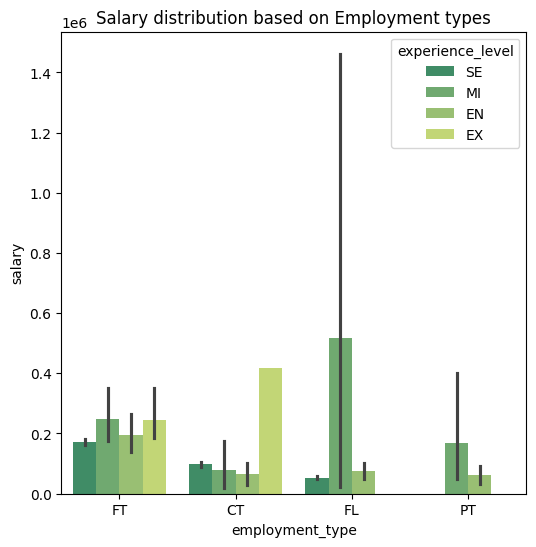

In [6]:
# Are there notable differences in salaries based on employment types
plt.figure(figsize=(6,6))
ax= sns.barplot(x='employment_type',y='salary',hue = 'experience_level',data=df,palette='summer')
plt.title('Salary distribution based on Employment types')
plt.show()

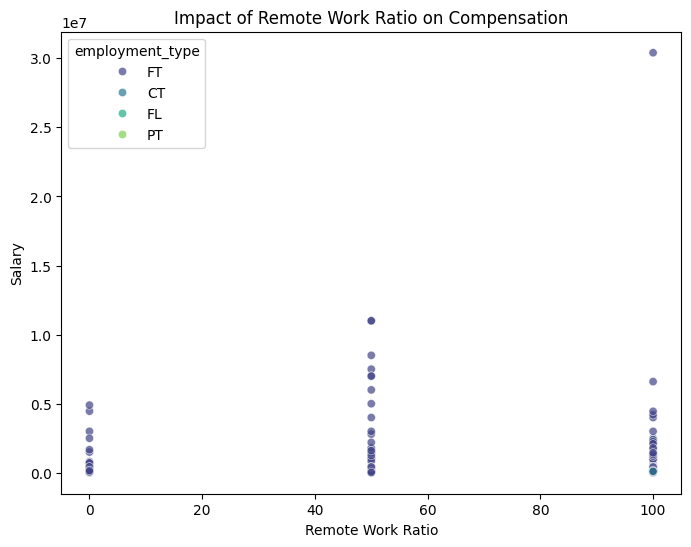

In [7]:
# 4.How does the remote work ratio impact the overall compensation of data science professionals
plt.figure(figsize=(8, 6))

# Plot scatter plot
sns.scatterplot(x='remote_ratio', y='salary', data=df, hue='employment_type', palette='viridis', alpha=0.7)

# Add labels and title
plt.title('Impact of Remote Work Ratio on Compensation')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary')

# Show the plot
plt.show()

<Axes: xlabel='work_year', ylabel='salary'>

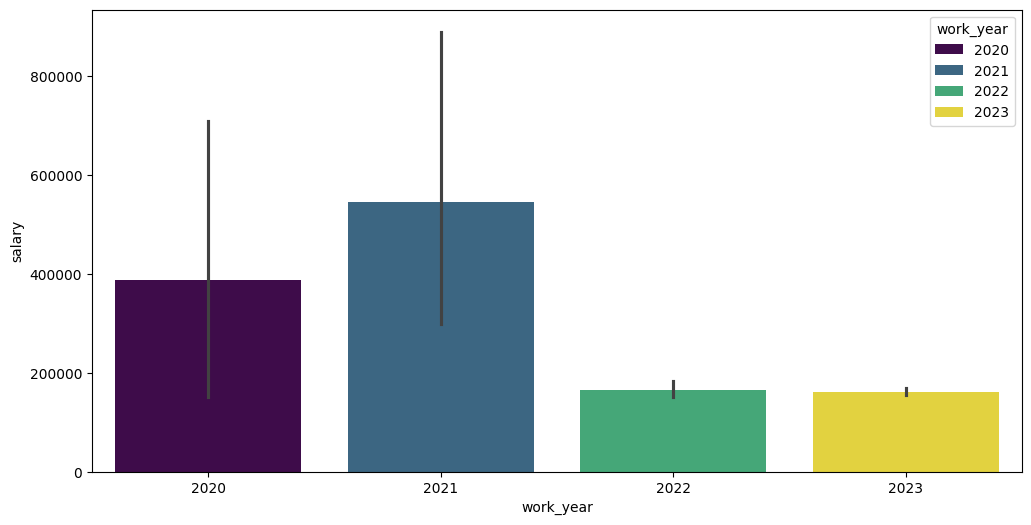

In [8]:
# 	5. What is the correlation between the number of years of work experience and salary
plt.figure(figsize=(12, 6))

# Plot bar plot
sns.barplot(x='work_year', y='salary', hue='work_year', data=df, palette='viridis')


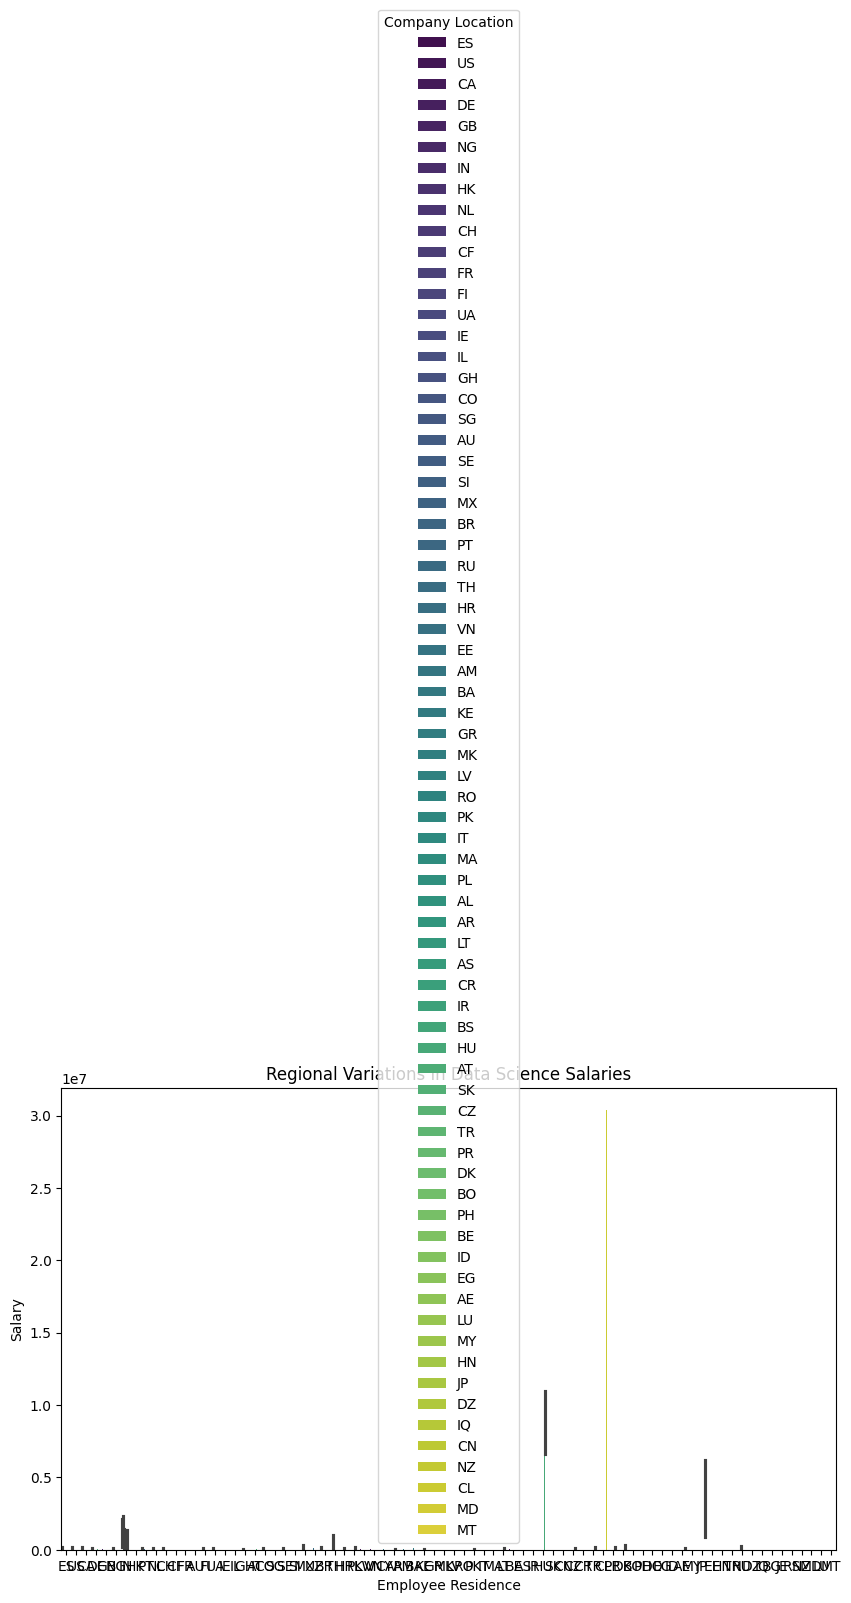

In [9]:
# 6.Are there regional variations in data science salaries based on employee residence and company location?
plt.figure(figsize=(10, 6))

# Plot box plot
ax = sns.barplot(x='employee_residence', y='salary', hue='company_location', data=df, palette='viridis')

# Add labels and title
plt.title('Regional Variations in Data Science Salaries')
plt.xlabel('Employee Residence')
plt.ylabel('Salary')
plt.legend(title='Company Location')

# Show the plot
plt.show()

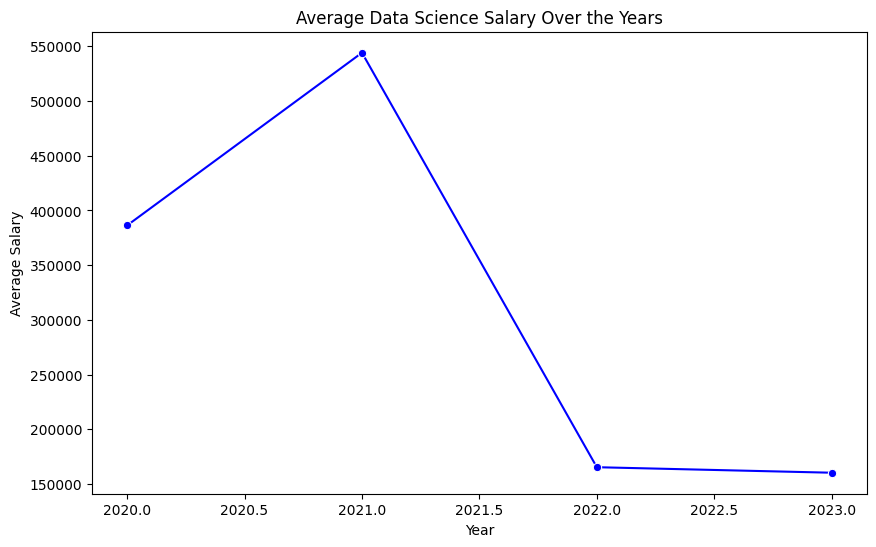

In [10]:
# 7	What trends can be observed in salary fluctuations over the years in the data science field?
average_salary_by_year = df.groupby('work_year')['salary'].mean().reset_index()

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot line chart
sns.lineplot(x='work_year', y='salary', data=average_salary_by_year, marker='o', color='b')

# Add labels and title
plt.title('Average Data Science Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')

# Show the plot
plt.show()

In [11]:
# 8 Is there a relationship between company size and the salaries offered to data science profess
df2 = df.groupby('company_size').apply('mean', numeric_only = True)
df2.reset_index(inplace=True)
df2

,company_size,work_year,salary,salary_in_usd,remote_ratio
0,L,2021.775330,438794.372247,118300.982379,60.572687
1,M,2022.501110,150712.836029,143130.548367,42.990802
2,S,2021.493243,281430.101351,78226.682432,72.297297


In [12]:
fig = px.bar(df2, x = 'company_size', y = 'salary', color = 'company_size', text = 'salary')
fig.show()

C:\Users\Edith\AppData\Local\Temp\ipykernel_12116\3386653309.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Salary (USD)')

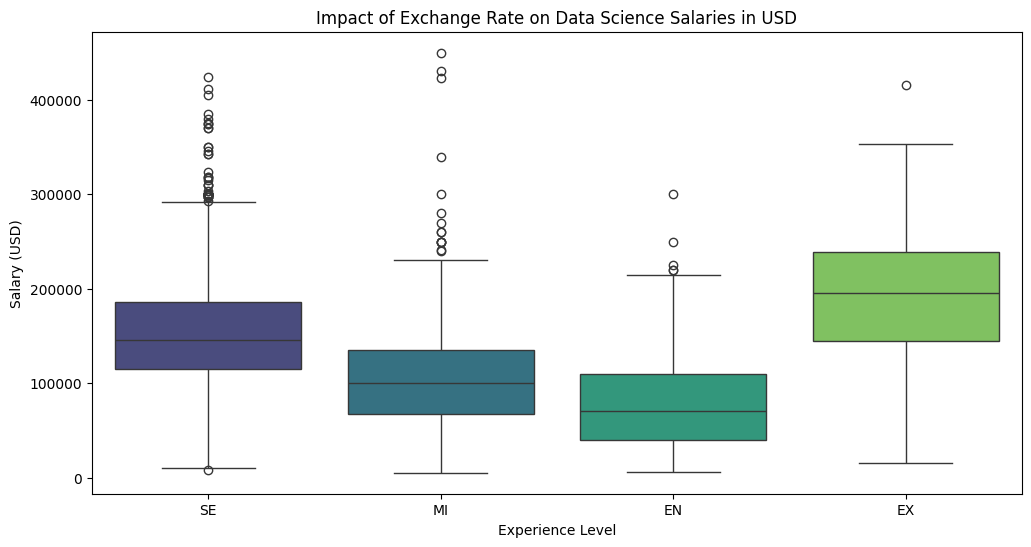

In [13]:
# 9How does the currency exchange rate affect the reported salaries in USD
plt.figure(figsize=(12, 6))

# Plot box plot
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='viridis')

# Add labels and title
plt.title('Impact of Exchange Rate on Data Science Salaries in USD')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

# Show the plot

In [14]:
# 10 Can patterns be identified in the distribution of salaries among different company locations
df2 = df.groupby('company_location').apply('mean', numeric_only = True)
df2.reset_index(inplace=True)
df2

,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AE,2021.333333,100000.000000,100000.000000,66.666667
1,AL,2022.000000,10000.000000,10000.000000,50.000000
2,AM,2023.000000,50000.000000,50000.000000,0.000000
3,AR,2022.000000,25000.000000,25000.000000,100.000000
4,AS,2021.333333,468333.333333,29351.000000,66.666667
...,...,...,...,...,...
67,TH,2022.333333,618333.333333,23064.333333,66.666667
68,TR,2021.400000,114600.000000,19058.000000,40.000000
69,UA,2022.500000,57850.000000,57850.000000,37.500000
70,US,2022.463158,157665.357566,151822.009539,44.440789


In [15]:
fig = px.bar(df2, x = 'company_location', y = 'salary', color = 'company_location', text = 'salary')
fig.show()